In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [39]:
def welch_t_test(mu1, s1, N1, mu2, s2, N2):
    """http://en.wikipedia.org/wiki/Welch%27s_t_test"""
    
    mu1 = np.asarray(mu1)
    mu2 = np.asarray(mu2)
    s1 = np.asarray(s1)
    s2 = np.asarray(s2)
    
    if not np.allclose(mu1.shape, mu2.shape):
        raise ValueError('mu1 and mu2 should have the same shape')
    
    if not np.allclose(s1.shape, s2.shape):
        raise ValueError('s2 and s2 should have the same shape')
    
    if not mu1.shape:
        # Construct arrays to make calculations more succint.
        N_i = np.array([N1, N2])
        dof_i = N_i - 1
        v_i = np.array([s1, s2]) ** 2
        # Calculate t-stat, degrees of freedom, use scipy to find p-value.
        t = (mu1 - mu2) / np.sqrt(np.sum(v_i / N_i))
        dof = (np.sum(v_i / N_i) ** 2) / np.sum((v_i ** 2) / ((N_i ** 2) * dof_i))
        p = stats.distributions.t.sf(np.abs(t), dof) * 2
        return t, p
    else:
        ps = []
        ts = []
        for _mu1, _mu2, _s1, _s2 in zip(mu1.flatten(), mu2.flatten(), s1.flatten(), s2.flatten()):
            t, p = welch_t_test(_mu1, _mu2, N1, _s1, _s2, N2)  
            ps.append(p)
            ts.append(t)
        return np.asarray(ts).reshape(mu1.shape), np.asarray(ps).reshape(mu1.shape)

In [23]:
p1 = np.random.randn(1000)
p2 = np.random.randn(1000) + 5

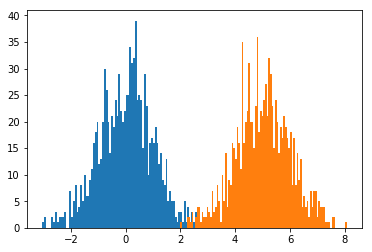

In [24]:
plt.hist(p1, bins=100)
plt.hist(p2, bins=100);

In [25]:
mu1, s1, N1 = np.mean(p1), np.std(p1), len(p1)
mu2, s2, N2 = np.mean(p2), np.std(p2), len(p2)

print(mu1, s1, N1)
print(mu2, s2, N2)

0.0208513613781 0.993320553933 1000
5.00720967245 1.00310824716 1000


In [26]:
welch_t_test(mu1, s1, N1, mu2, s2, N2)

(-111.69646665206189, 0.0)

In [33]:
t, p = welch_t_test([[mu1, mu1], [mu1, mu1]], [[s1, s1], [s1, s1]], N1, 
                    [[mu2, mu2], [mu2, mu2]], [[s2, s2], [s2, s2]], N2)

In [34]:
t, p =  welch_t_test(mu1, s1, N1, mu2, s2, N2):

array([[  2.36013383e-09,   2.36013383e-09],
       [  2.36013383e-09,   2.36013383e-09]])

In [35]:
p

array([[-6.02192844, -6.02192844],
       [-6.02192844, -6.02192844]])

In [13]:
df.array.values 

Ttest_indResult(statistic=-110.71854942034835, pvalue=0.0)

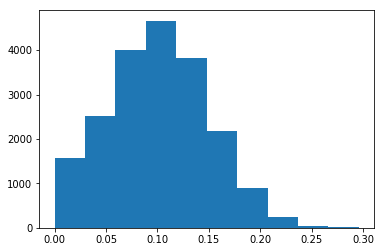

In [14]:
fakeps = np.clip(np.random.randn(200, 100) * 0.05 + 0.1, 0, 1)
plt.hist(fakeps.flatten());

In [15]:
fakeps[2:29, 2:29] = 0.00000001

In [16]:
def fdr_threshold(pvalues, alpha=0.05):
    """Computes the FDR threshod after Wilks (2016)."""
    p = np.sort(np.asarray(pvalues).flatten())
    n = len(p)
    return np.max(np.where(p <= (np.arange(1, n+1) / n * alpha), p, 0))

In [17]:
new_alpha = fdr_threshold(fakeps, alpha=0.05)
new_alpha

0.0030694727960693807

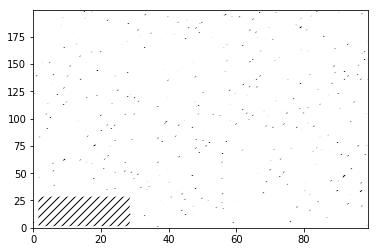

In [18]:
# plot my anomaly with xarray
plt.contourf(fakeps < new_alpha, hatches=['///'], colors='none', levels=[0.5, 1.5]);

In [19]:
fakeps < new_alpha

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)